In [ ]:
# uploaded = files.upload()

Saving survey.csv to survey.csv


In [19]:
# from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

In [4]:
df = pd.read_csv(r"D:\Codes\College Code\CDC Internship\data\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Exploratory Data Analysis

Basic Info

In [ ]:
df.shape

(1259, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

Missing Values

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


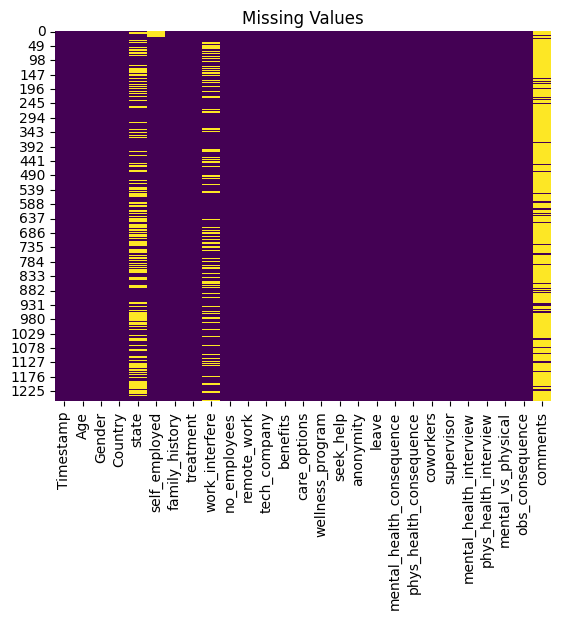

In [ ]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar = False, cmap = "viridis")
plt.title("Missing Values")
plt.show()

In [6]:
# Dropping columns that are either irrelevant for prediction or may induce bias (e.g., country)
# Also handling missing values in categorical columns

df.drop(["Timestamp", "Country","state","comments"],axis = 1, inplace = True)
df["work_interfere"] = df["work_interfere"].fillna("Unknown")
df["self_employed"] = df["self_employed"].fillna("No")

In [7]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [8]:
def clean_gender(gender):
    gender = str(gender).strip().lower()

    if any(x in gender for x in ['female', 'woman', 'f',"F"]):
        return 'Female'
    elif any(x in gender for x in ['male', 'man',"cis-man","m","M"]):
        return 'Male'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

Target Variable Analysis

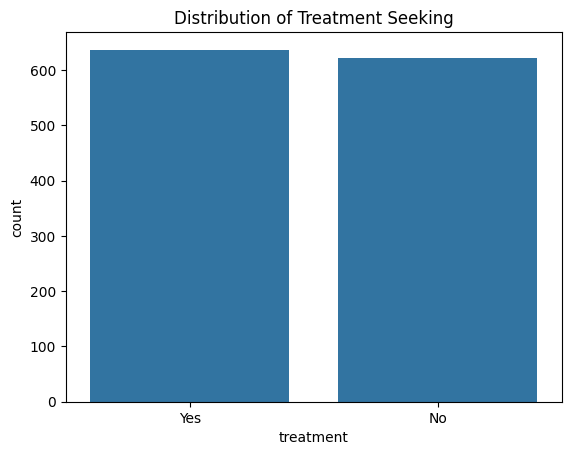

treatment
Yes    0.505957
No     0.494043
Name: proportion, dtype: float64

In [9]:
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment Seeking')
plt.show()

df['treatment'].value_counts(normalize=True)

Univariate Analysis

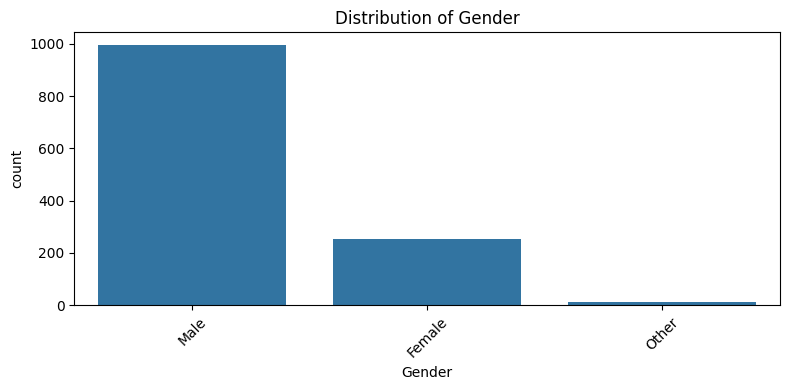

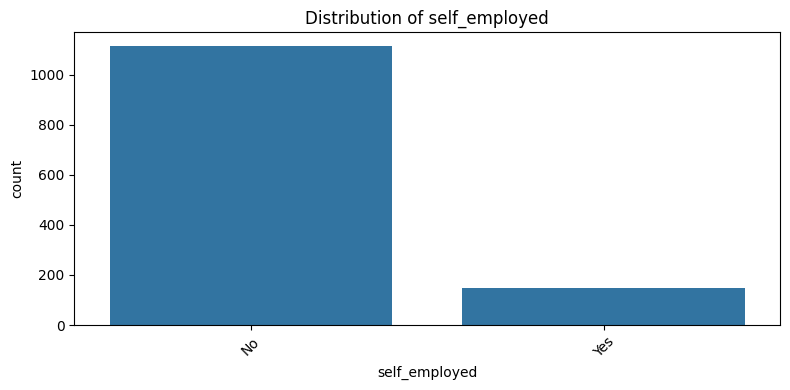

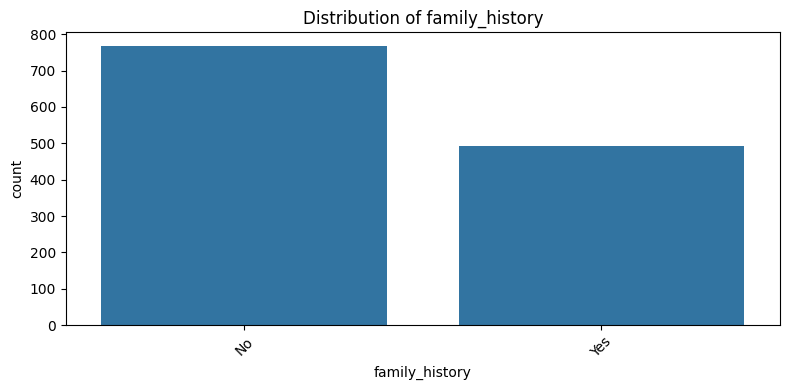

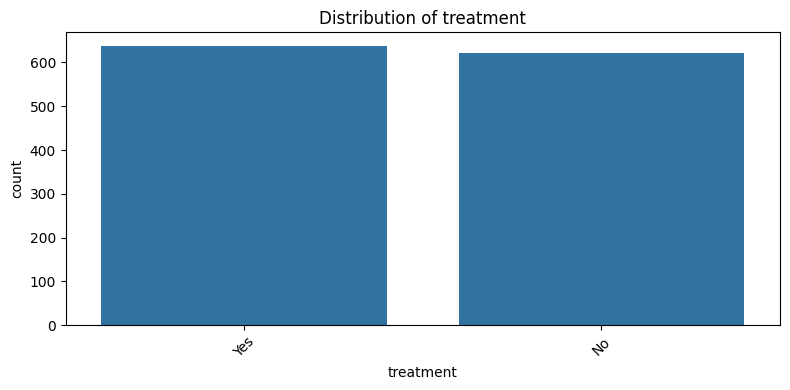

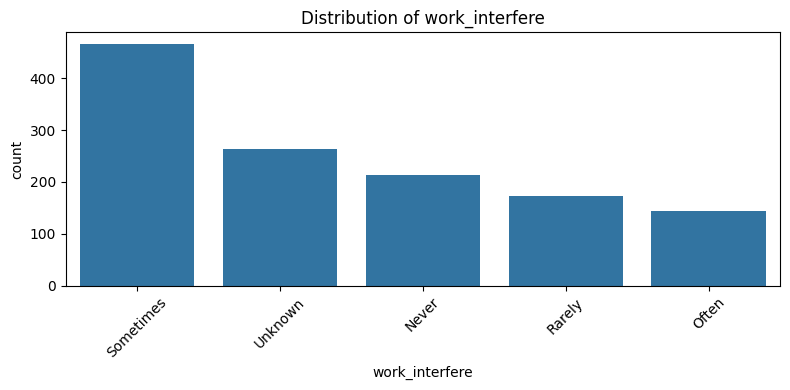

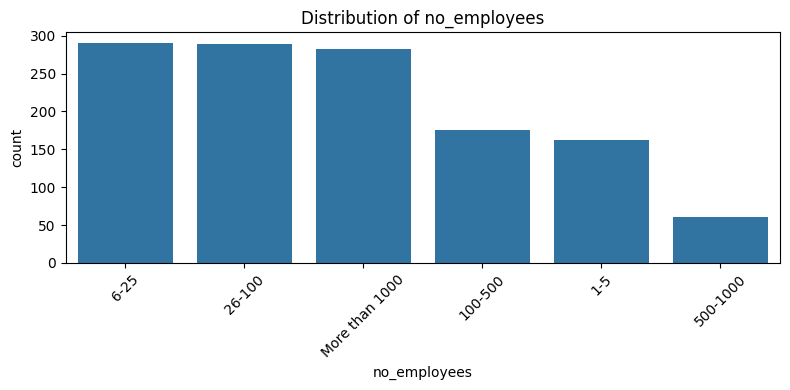

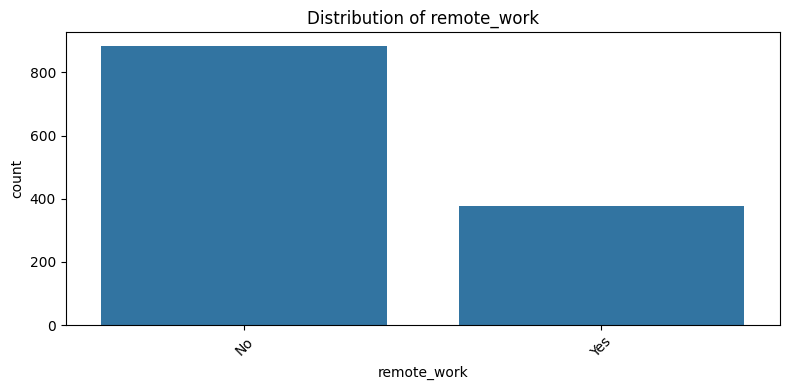

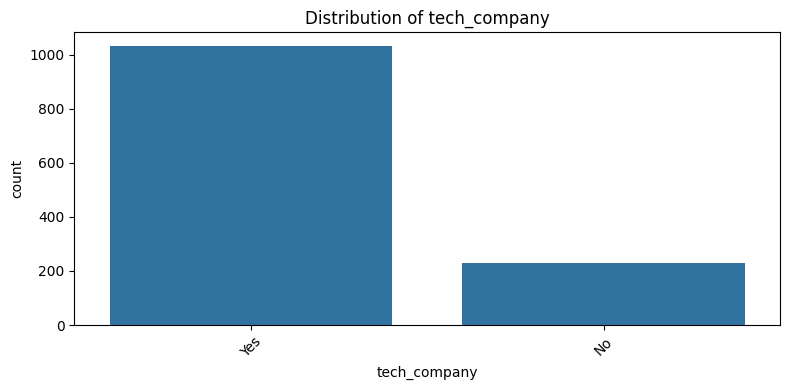

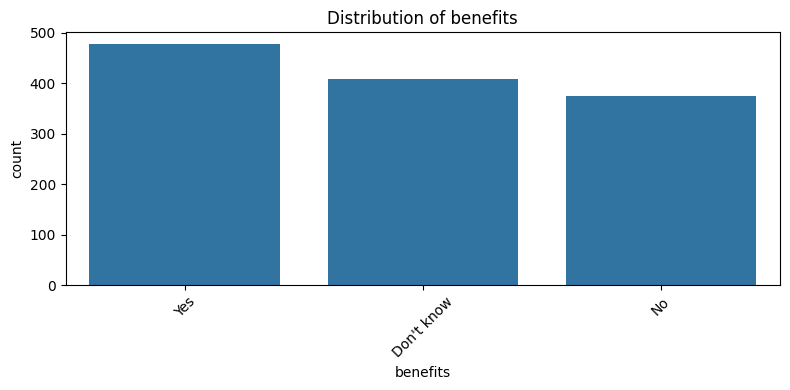

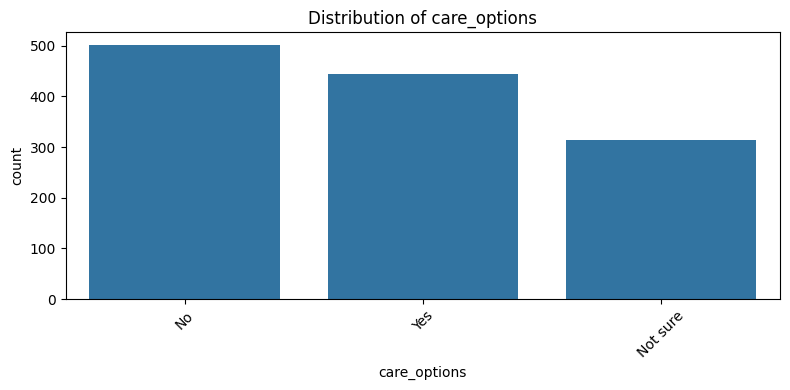

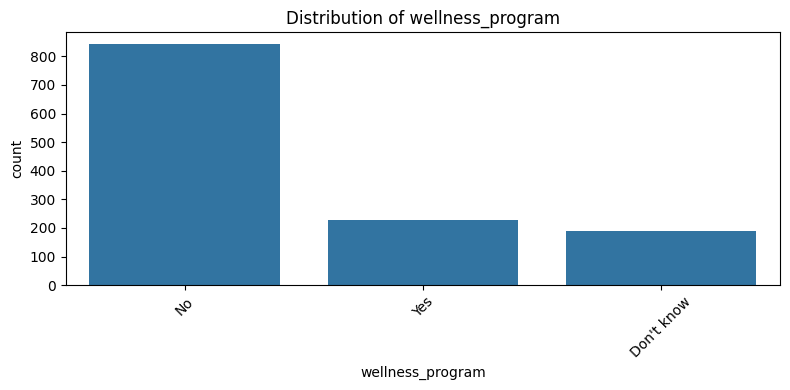

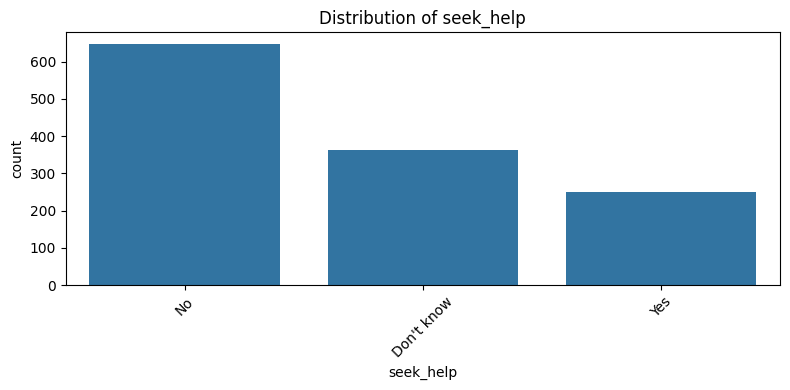

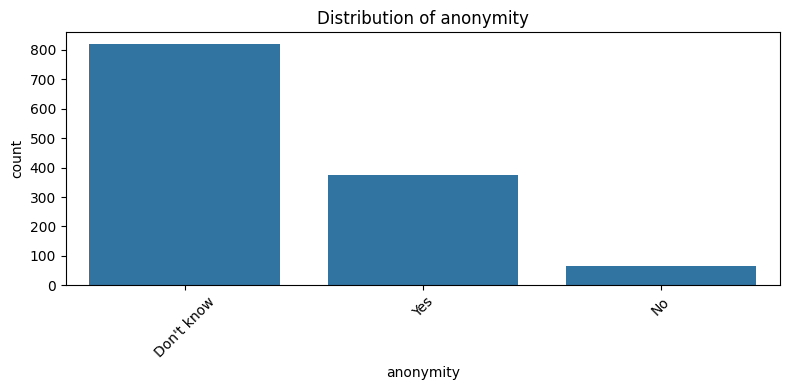

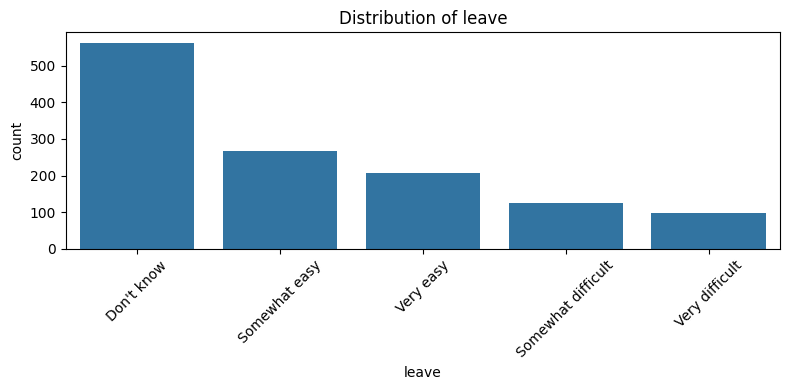

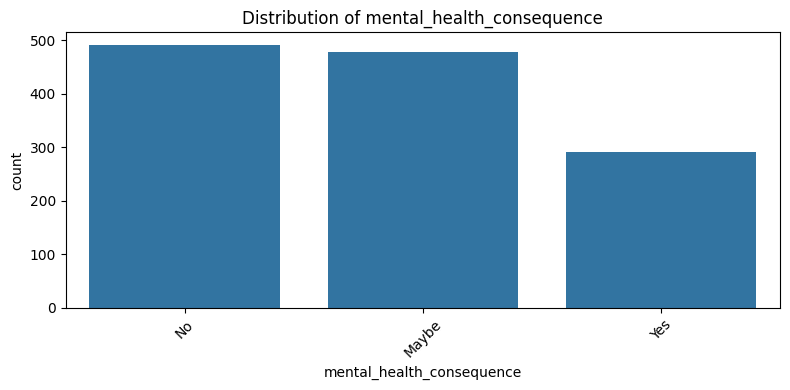

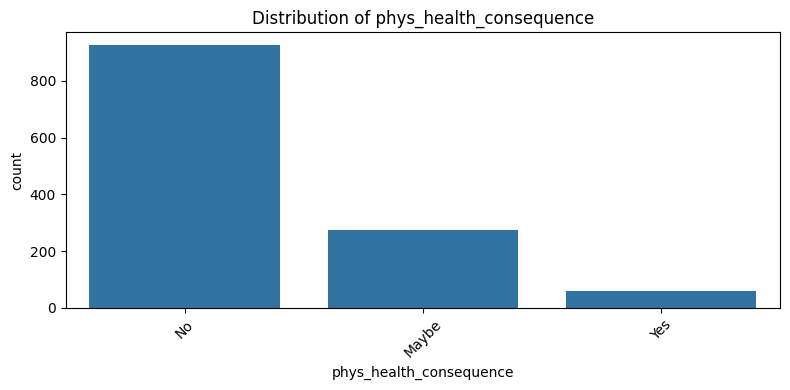

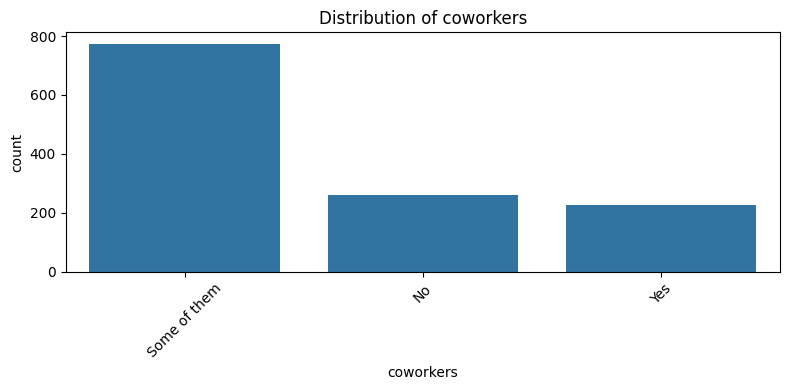

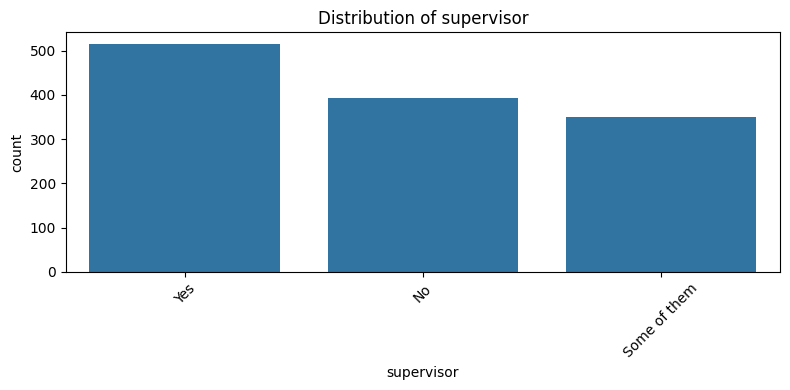

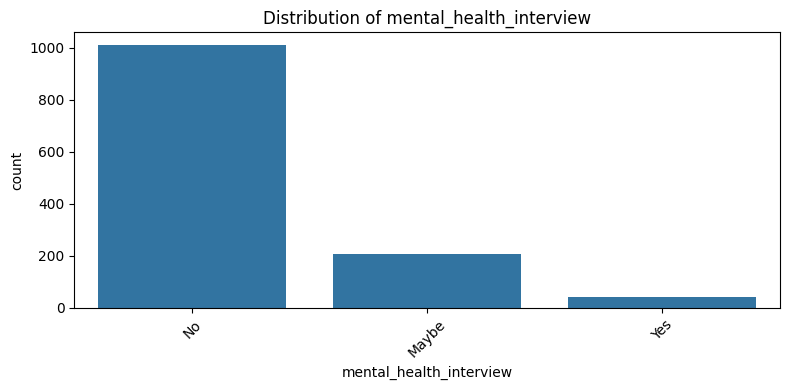

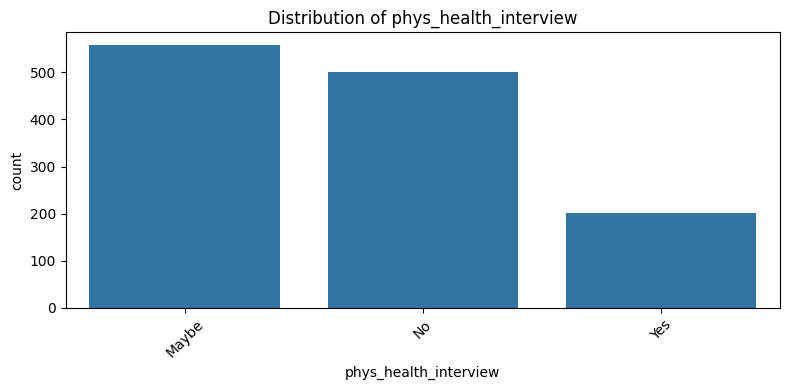

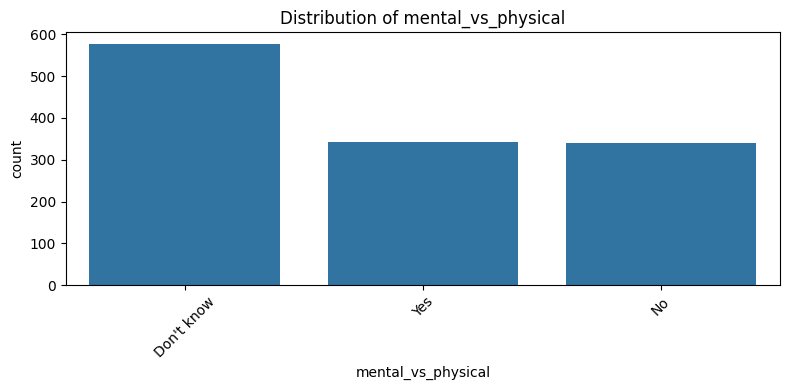

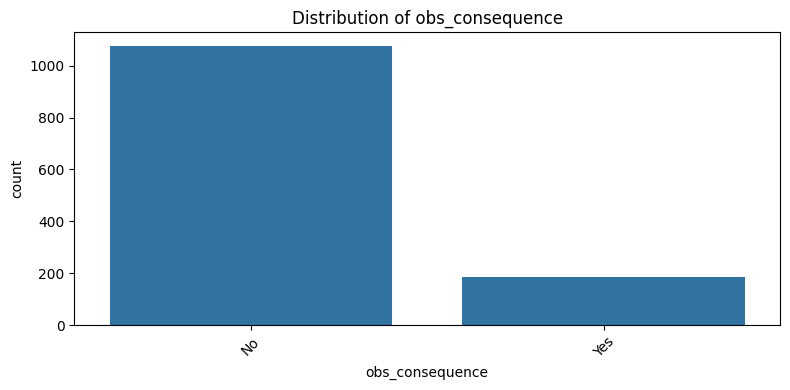

In [10]:
#For Categorical Features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


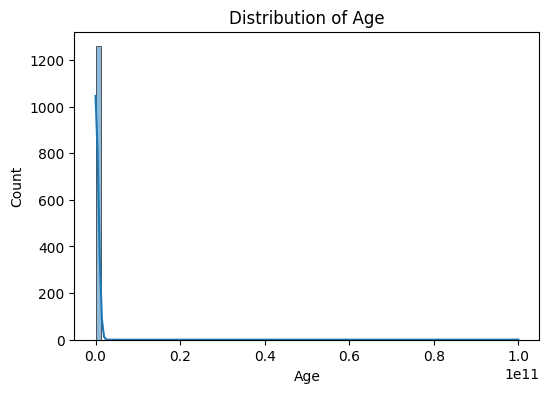

In [11]:
#For numerical Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Bivariate Analysis

--- Gender ---


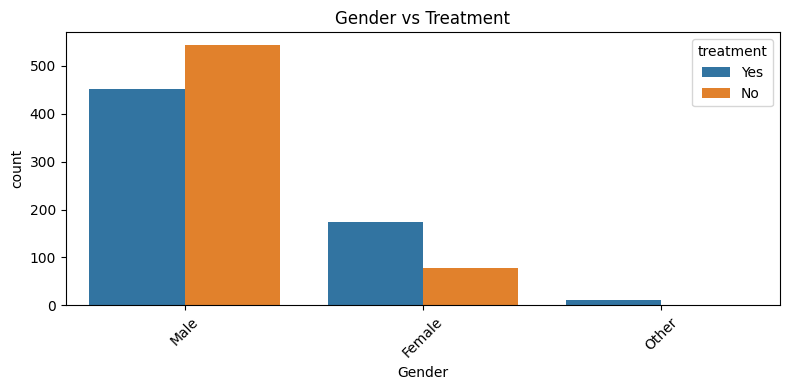

treatment         No        Yes
Gender                         
Female     30.952381  69.047619
Male       54.627767  45.372233
Other       7.692308  92.307692


--- self_employed ---


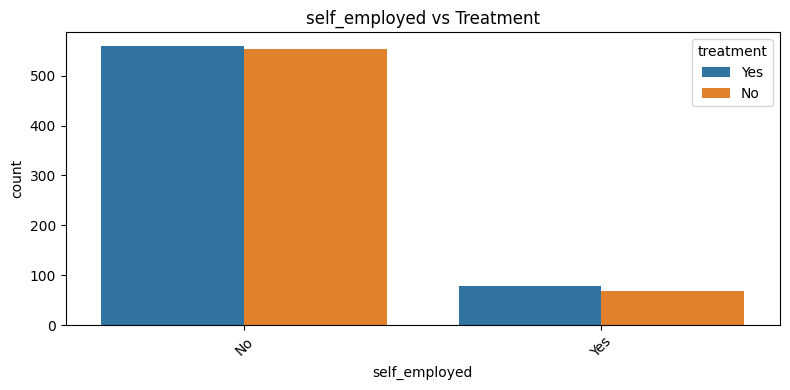

treatment             No        Yes
self_employed                      
No             49.775382  50.224618
Yes            46.575342  53.424658


--- work_interfere ---


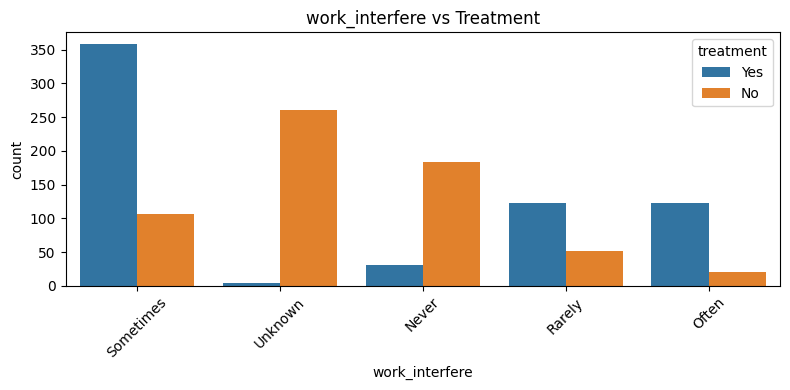

treatment              No        Yes
work_interfere                      
Never           85.915493  14.084507
Often           14.583333  85.416667
Rarely          29.479769  70.520231
Sometimes       23.010753  76.989247
Unknown         98.484848   1.515152


--- family_history ---


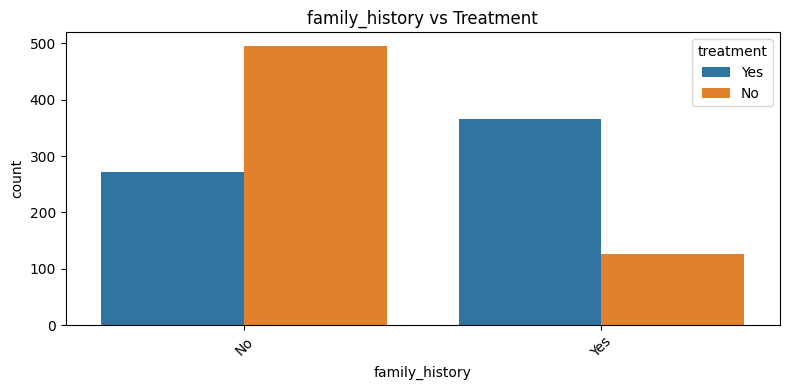

treatment              No        Yes
family_history                      
No              64.537158  35.462842
Yes             25.813008  74.186992


--- mental_vs_physical ---


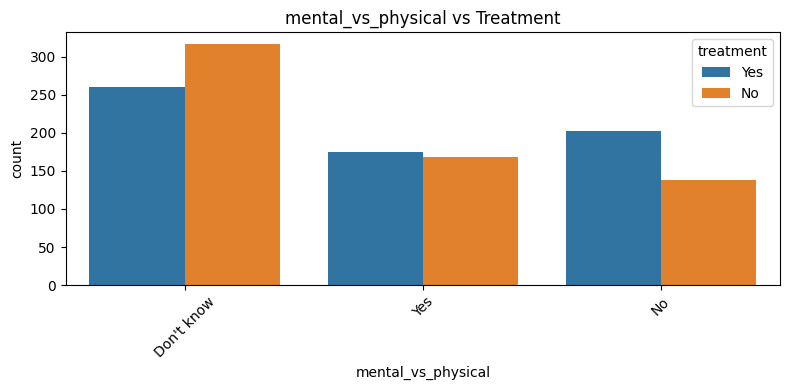

treatment                  No        Yes
mental_vs_physical                      
Don't know          54.861111  45.138889
No                  40.588235  59.411765
Yes                 48.979592  51.020408


--- supervisor ---


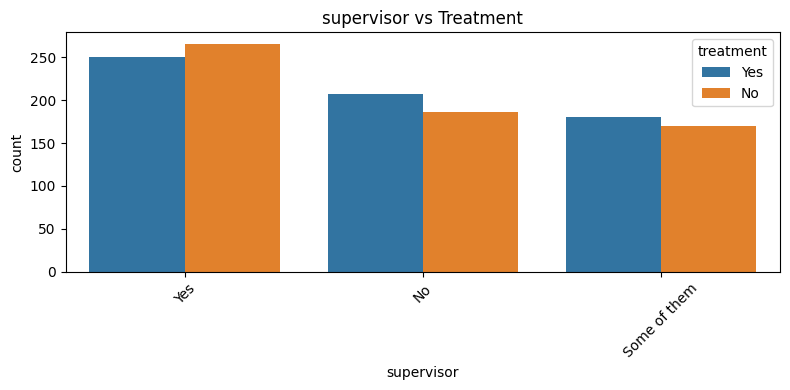

treatment            No        Yes
supervisor                        
No            47.328244  52.671756
Some of them  48.571429  51.428571
Yes           51.550388  48.449612




In [12]:
features = ['Gender', 'self_employed', 'work_interfere', 'family_history', 'mental_vs_physical', 'supervisor']

for feature in features:
    print(f"--- {feature} ---")

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='treatment', data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature} vs Treatment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    treatment_ratio = pd.crosstab(df[feature], df['treatment'], normalize='index') * 100
    print(treatment_ratio)
    print("\n")



Encoding

In [13]:
#Label Encoding
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [14]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [15]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Training Models
#Logistic Regression
log_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression with Scaling ===")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_log) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

=== Logistic Regression with Scaling ===
Accuracy: 71.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       129
           1       0.72      0.69      0.71       123

    accuracy                           0.72       252
   macro avg       0.72      0.72      0.72       252
weighted avg       0.72      0.72      0.72       252

Confusion Matrix:
 [[96 33]
 [38 85]]


In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree Classifier ===")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


=== Decision Tree Classifier ===
Accuracy: 72.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       129
           1       0.71      0.73      0.72       123

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

Confusion Matrix:
 [[93 36]
 [33 90]]


In [47]:
#Random Forest
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(final_model, f)


Model Accuracy: 83.33%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       129
           1       0.80      0.88      0.84       123

    accuracy                           0.83       252
   macro avg       0.84      0.83      0.83       252
weighted avg       0.84      0.83      0.83       252

Confusion Matrix:
[[102  27]
 [ 15 108]]


In [ ]:
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>